In [2]:
#!/usr/bin/python3
import pandas as pd
import os
import nltk
import string
import re
import warnings
import numpy as np
from matplotlib import reload
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
import Error
reload(Error)

<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [3]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
    return data

def predict_category(s,train, model,names):
    pred = model.predict([s])
    return pred

In [4]:
#data = pd.read_excel("U:/JIRA/JIRAExport/sample.xls")
#test_data=data[data['Status']=='Submitted']
train_data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
train_data=train_data.dropna()
train_data=replace_strings(train_data,'Component/s')
#test_data=replace_strings(test_data,'Component/s')
#comp1=list(data['Component/s'].unique())
comp2=list(train_data['Component/s'].unique())

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#comp=list(set().union(comp1,comp2))
Comp=[]
for each in comp2:
    if(each.find(',')!=-1):
        Comp.append(each.split(",")[-1])
    else:
        Comp.append(each)

In [6]:
len(train_data)

82592

In [7]:
Comp=comp2
train_data['Component/s']=train_data['Component/s'].replace(Comp,range(len(Comp)))
#test_data['Component/s']=test_data['Component/s'].replace(Comp,range(len(Comp)))
warnings.filterwarnings("ignore")


In [10]:

train_data=train_data.sample(frac=1.0, replace=True)

train=train_data.sample(frac=0.90,random_state=120)
test=train_data.drop(train.index)
train.head()

,Issue Key,Summary,Status,Created,Description,Resolved Date
80524,NCG3D-26961,"[Scope2]CDT : 22 10 05,22 10 07 detected as va...",Closed,2016-10-05 05:29:54,h4. Test Environment :\n* HW Sample : 008\n* D...,2017-03-30 12:43:26
45610,NCG3D-103798,Manufacturer ID is not printed correctly,Closed,2018-06-14 11:02:29,h4. Test Environment :\n* HW Sample : \n* Devi...,2018-07-24 09:34:39
53427,NCG3D-56618,AIVIBP-2974 Lost CAN communication with Around...,Closed,2017-07-05 11:16:45,{color:red} !!! Customer Ticket !!! {color} \n...,2017-11-21 11:12:28
82239,NCG3D-98528,[P-IVI_BTA_1002_180503]BTA volume is not retai...,Closed,2018-05-08 06:44:56,h4. Test Environment :\n* HW Sample :{color:bl...,2018-10-04 00:00:52
50619,NCG3D-104589,No Audio After Hot Start For Any Source,Closed,2018-06-20 14:35:33,{color:red} !!! Customer Ticket !!! {color}\n\...,2018-07-21 15:52:32


In [ ]:
y = train_data.pop('Component/s')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)

In [7]:
#test=test_data.sample(frac=0.2, replace=True)
test.head()


,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
30491,NCG3D-64215,AIVIBP-3631 MEX [ Display not correct in Engin...,Closed,2017-08-17 05:33:49,SW_DRIVEASSIST,{color:red} !!! Customer Ticket !!! {color} \n...,2017-11-30 11:10:25
26087,NCG3D-5690,"On the FM TOP screen, USB audio was played",Closed,2015-12-04 03:49:08,SW_FRAMEWORK_HMI,{color:red} !!! Customer Ticket !!! {color} \n...,2016-03-17 10:53:53
11798,NCG3D-35427,Screen freezes when reverse gear is engaged/di...,Closed,2017-01-09 15:39:33,SW_Master_HMI,h4. Test Environment :\n* HW Sample : *A3 samp...,2017-02-14 14:20:57
7269,NCG3D-87635,Check for updates works only after replacing P...,Closed,2018-02-21 11:54:59,SW_OTAS,h4. Test Environment :\n* HW Sample : Renault ...,2018-07-04 10:40:00
24238,NCG3D-89763,ESE settings are not sent to Premium 1 amplifi...,Closed,2018-03-07 12:35:44,SW_AUDIO,h4. Test Environment :\n* HW Sample : Renault ...,2018-04-26 11:06:54


In [8]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['Summary'])
X_train_counts.shape

(74333, 26565)

In [9]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(74333, 26565)

In [10]:
clf = MultinomialNB().fit(X_train_tfidf, train['Component/s'])
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [11]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(train['Summary'], train['Component/s'])

In [12]:
predicted = text_clf.predict(test['Summary'])
np.mean(predicted == test['Component/s'])

0.5

In [13]:
Error.err.err(test['Component/s'],predicted)

In [ ]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(X_train, y_train)

predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)

np.mean(predicted_mnb_stemmed == y_test)

In [15]:
Error.err.err(test['Component/s'],predicted_mnb_stemmed)

In [16]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train['Summary'], train['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [17]:
print("Best Score",gs_clf.best_score_)
print("Best Parameters",gs_clf.best_params_)

Best Score 0.8096538549500222
Best Parameters {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [18]:
text_clf_best = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=False)),('clf', MultinomialNB(alpha=0.01))])
text_clf_best = text_clf_best.fit(train['Summary'], train['Component/s'])
predicted_best = text_clf_best.predict(test['Summary'])
np.mean(predicted_best == test['Component/s'])

0.6957561267184699

In [19]:
Error.err.err(test['Component/s'],predicted_best)

In [20]:
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train['Summary'], train['Component/s'])
predicted_svm = text_clf_svm.predict(test['Summary'])
np.mean(predicted_svm == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6589958158995816

In [21]:
Error.err.err(test['Component/s'],predicted_svm)

In [22]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_svm_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('svm', SGDClassifier())])

text_svm_stemmed = text_svm_stemmed.fit(train['Summary'], train['Component/s'])

predicted_svm_stemmed = text_svm_stemmed.predict(test['Summary'])

np.mean(predicted_svm_stemmed == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6969515839808726

In [23]:
Error.err.err(test['Component/s'],predicted_svm_stemmed)

In [24]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train['Summary'], train['Component/s'])


print("Best Score",gs_clf_svm.best_score_)
print("Best Parameters",gs_clf_svm.best_params_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Best Score 0.7230705070426324
Best Parameters {'clf-svm__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [25]:
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-2, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train['Summary'], train['Component/s'])
predicted_svm = text_clf_svm.predict(test['Summary'])
np.mean(predicted_svm == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6838015540944411

In [26]:
Error.err.err(test['Component/s'],predicted_svm)

In [27]:
test['Prediction_MNB']=predicted_mnb_stemmed
test['Prediction_svm']=predicted_svm
test['Prediction_mnb']=predicted_best
test['predicted_svm_stemmed']=predicted_svm_stemmed
test[['Summary','Component/s','Prediction_mnb','Prediction_svm','Prediction_MNB','predicted_svm_stemmed']]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,Summary,Component/s,Prediction_mnb,Prediction_svm,Prediction_MNB,predicted_svm_stemmed
30491,AIVIBP-3631 MEX [ Display not correct in Engin...,SW_DRIVEASSIST,SW_DRIVEASSIST,SW_DRIVEASSIST,SW_DRIVEASSIST,SW_DRIVEASSIST
26087,"On the FM TOP screen, USB audio was played",SW_FRAMEWORK_HMI,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT
11798,Screen freezes when reverse gear is engaged/di...,SW_Master_HMI,SW_PARKASSIST,SW_PARKASSIST,SW_PARKASSIST,SW_PARKASSIST
7269,Check for updates works only after replacing P...,SW_OTAS,SW_OTAS,SW_OTAS,SW_NAVIGATION,SW_INFOTAINMENT
24238,ESE settings are not sent to Premium 1 amplifi...,SW_AUDIO,SW_AUDIO,SW_METER,SW_AUDIO,SW_AUDIO
58877,[SXM Audio] Artist Alerts are not listed in ...,SW_TUNER_SXM,SW_TUNER_SXM,SW_TUNER_SXM,SW_TUNER_SXM,SW_TUNER_SXM
23187,AIVIBP-13154 BCall and CCall icons are crossed...,SW_TELEMATIC,SW_NAVIGATION,SW_TELEMATIC,SW_TELEMATIC,SW_TELEMATIC
74011,"Keyboard_Thai is not displayed in navigation, ...",SW_Master_HMI,SW_INFOTAINMENT,SW_NAVIGATION,SW_INFOTAINMENT,SW_INFOTAINMENT
8073,Carplay: Audio_warning is not sent by incoming...,SW_METER,SW_METER,SW_SMARTPHONE,SW_METER,SW_SMARTPHONE
16009,AIVIBP-16529 HMI : Title is not display in Sys...,SW_SYSTEM,SW_SYSTEM,SW_SYSTEM,SW_INFOTAINMENT,SW_INFOTAINMENT


In [28]:
all_perfect=len(test[(test['Component/s']==test['Prediction_mnb' ] )&( test['Component/s']==test['Prediction_svm' ]) & ( test['Component/s']==test['Prediction_MNB' ])&( test['Component/s']==test['predicted_svm_stemmed' ])])
mod1=len(test[(test['Component/s']==test['Prediction_mnb' ])]) 
mod2=len(test[(test['Component/s']==test['Prediction_svm' ])]) 
mod3=len(test[(test['Component/s']==test['Prediction_MNB' ])]) 
mod4=len(test[(test['Component/s']==test['predicted_svm_stemmed' ])]) 
mod5=262
plot_data=np.array([all_perfect,mod1,mod2,mod3,mod4,mod5])
names=['All Correct','MNB','SVM','Stemmed MNB','SVM_Stemmed','LDA']

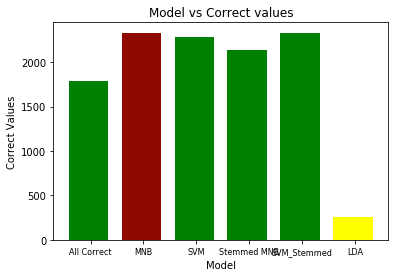

In [29]:
xticklabels = (names)
# Remove the single quotes, commas and enclosing square brackets
xtlabs = names

indices = np.arange(len(names))
width = 0.75
fig = plt.figure()
col=('green','#900900','green','green','green','yellow')
plt.title('Model vs Correct values')
plt.xlabel('Model')
plt.ylabel('Correct Values')
plt.bar(indices, plot_data, width,color=col)
plt.xticks(indices + width * 0.05, xtlabs, rotation='horizontal', fontsize=8)

plt.savefig('Model_Correct.png')
plt.show()


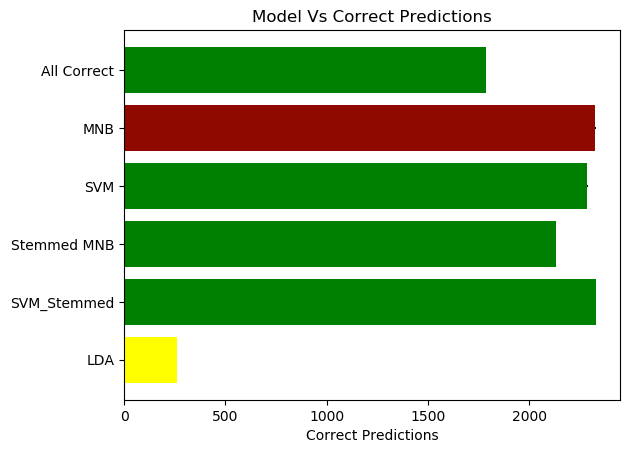

In [30]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = names
y_pos = np.arange(len(people))
performance = plot_data
error = np.random.rand(len(people))
col=('green','#900900','green','green','green','yellow')
ax.barh(y_pos, performance, xerr=error, align='center',
        color=col, ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correct Predictions')
ax.set_title('Model Vs Correct Predictions')
plt.show()

In [31]:
plot_data

array([1789, 2328, 2288, 2134, 2332,  262])

In [32]:
D=pd.DataFrame()
D['Model']=names
D['Accuracy']=plot_data*100/len(test)

In [33]:
D.to_csv("Plot_data.csv")

In [34]:
accu=plot_data[1:]/len(test)

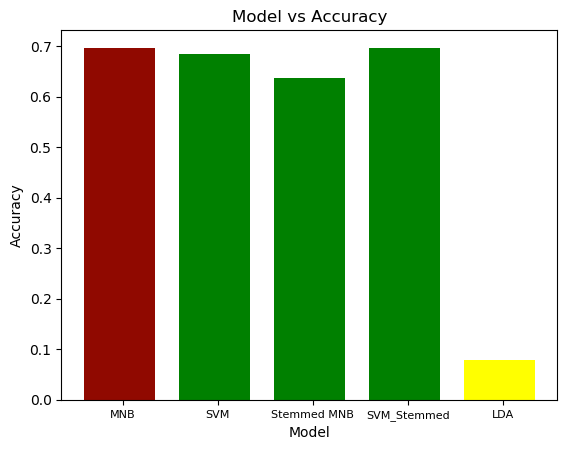

In [35]:
xticklabels = (names[1:])
# Remove the single quotes, commas and enclosing square brackets
xtlabs = names[1:]

indices = np.arange(len(names[1:]))
width = 0.75
fig = plt.figure()
col=('#900900','green','green','green','yellow')
plt.title('Model vs Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.bar(indices, accu, width,color=col)
plt.xticks(indices + width * 0.05, xtlabs, rotation='horizontal', fontsize=8)
plt.savefig('Model_Accuracy.png')
plt.show()

In [36]:
xticklabels

['MNB', 'SVM', 'Stemmed MNB', 'SVM_Stemmed', 'LDA']

In [37]:
262/len(test)

0.07830245068738792

In [38]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_data['Summary'], train_data['Component/s'])

In [39]:
len(valid_x)

20648